In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Youngov modul pružnosti - rozťažnosť vecí okolo nás

Cieľom tohto cvičenia je zoznámenie sa s jednoduchým modelom deformácie.

Youngov modul (alebo modul pružnosti v ťahu) $E$, je materiálová konštanta popisujúca pomer medzi napätím v ťahu $\sigma$ a pomerným predĺžením pod napätím $\varepsilon$.

\begin{equation*}
 E = \frac{\sigma}{\varepsilon}
\end{equation*}


Napätie v ťahu $\sigma$ je fyzikálna veličina ktorá je definovaná ako pomer veľkosti sily $F$ na plochu ku ploche na ktorú táto sila pôsobí $S$
\begin{equation*}
 \sigma = \frac{F}{S}.
\end{equation*}
Ako príklad si môžeme predstaviť valec s podstavou s obsahom plochy $S$, na ktorú pôsobíme silou $F$. Čím bude prierez valca $S$ užší, tým väčšie bude napätie v ťahu $\sigma$ a naopak. Pre silu platí priama umera - čím väčšia sila $F$, tým väčšie napätie v ťahu $\sigma$ a čím menšia sila $F$, tak tým menšie aj napätie v ťahu $\sigma$.

Pomerné predĺženie $\varepsilon$ je pomer medzi predĺžením (alebo skrátením) objektu $\Delta l$, ktoré je podrobené väčšej sile, ktorá ho deformuje a jeho pôvodnou dĺžkou $l$
\begin{equation*}
 \varepsilon = \frac{\Delta l}{l}.
\end{equation*}
Výslek je teda predĺženie objektu vyjadrené v pomere voči pôvodnej dĺžke $l$ (pri predĺžení $\Delta l = l$ je relatívne predĺženie $\varepsilon = 1$). Preto ho nazývame „pomerné“.

Tento náš model na popis deformácie objektov funguje len pre malé deformácie a v prípade keď je závislosť pomerného predĺženia $\varepsilon$ na napätí v ťahu $\sigma$ lineárna.

<img src="diagram_prelozeny.png" width="700"/>

Na obrázku vyššie môžeme vidieť typický priebeh závislosti napätia v ťahu $\sigma$ (na obrázku ako $R$) na pomernom predĺžení $\varepsilon$ na tzv. ťahovom diagrame. V prvej časti od začiatku grafu až do medze úmernosti je závislosť lineárna. To je presne tá oblasť, v ktorej náš model deformácie funguje.

https://en.wikipedia.org/wiki/Young%27s_modulus \
https://sk.wikipedia.org/wiki/Youngov_modul

In [2]:
# Načítanie dát o moduloch priežnosti rôznych materiálov
data = pd.read_table("data_wiki.txt", sep = "\t")

# Zdroj dat
# https://en.wikipedia.org/wiki/Young%27s_modulus#Examples

Pozrime sa na to, ako sa bude predlžovať zlatý valček retiazky o rôznych prierezoch. Platí vzorec $\varepsilon = \frac{\sigma}{E}$.

In [3]:
# Definujeme si funkci pro vypocet plochy (prurezu) z polomeru "r"
def prurez(r):
    return(np.pi*r**2)

r = np.linspace(0.001,0.008,8)      # Rozsah priemeru tenkého valecku (v metroch)
S = prurez(r)

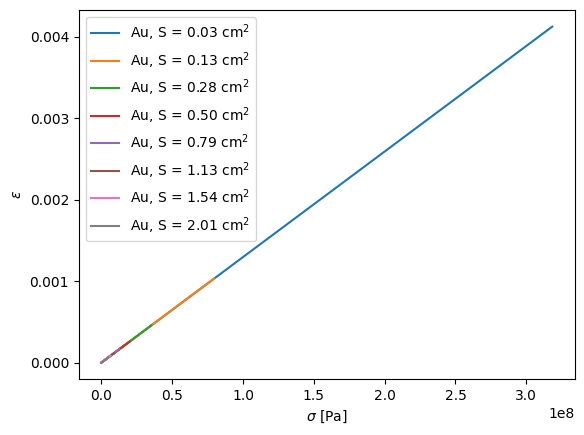

In [4]:
F = np.linspace(0,1000,1000)                                                                    #Rozsah síly 0-1000 N
gold_ym = float(data[data["Material"] == "Gold"]["Young's modulus (GPa)"].values[0])*10**9      #Youngov modul pre zlato prevedený na pascaly

for i in range(len(S)):
    plt.plot(F/S[i], (F/S[i])/gold_ym, label = f"Au, S = {10**4*S[i]:,.2f} cm$^2$")

plt.xlabel(r"$\sigma$ [Pa]")
plt.ylabel(r"$\varepsilon$")

plt.legend()

Môžeme vidieť, že zmenšenie prierezu pri zachovaní rozsahu sily $F$ sa zmenší maximálna hodnota napätia v ťahu a tým pádom aj maximálne predĺženie v ťahu. Poďme sa pozrieť na rôzne materiály!

In [5]:
coppper_ym = float(data[data["Material"] == "Copper (Cu), annealed"]["Young's modulus (GPa)"].values[0])*10**9      #Youngov modul pre meď převedený na pascaly
titanium_ym = float(data[data["Material"] == "Titanium (22Ti)"]["Young's modulus (GPa)"].values[0])*10**9           #Youngov modul pre titan převedený na pascaly
bronze_ym = float(data[data["Material"] == "Bronze"]["Young's modulus (GPa)"].values[0])*10**9                      #Youngov modul pre bronz převedený na pascaly
steel_ym = float(data[data["Material"] == "Steel, A36"]["Young's modulus (GPa)"].values[0])*10**9                   #Youngov modul pre oceľ A36 prevedený na pascaly

Predpokladajme, že vytvoríme zo všetkých našich materiálov (Zlato, meď, titán, bronz a oceľ) tenký drôt s prierezom $S = 1 \text{ mm}^2$. A budeme na jeden z jeho koncov pôsobiť silou v rozsahu $F \in [0 \text{ N},1000 \text{ N}]$.

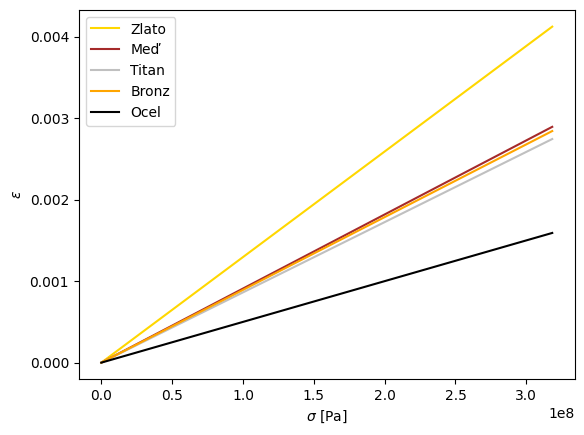

In [6]:
S = prurez(0.001)

plt.plot(F/S, (F/S)/gold_ym, label = f"Zlato", color = "gold")
plt.plot(F/S, (F/S)/coppper_ym, label = f"Meď", color = "brown")
plt.plot(F/S, (F/S)/titanium_ym, label = f"Titan", color = "silver")
plt.plot(F/S, (F/S)/bronze_ym, label = f"Bronz", color = "orange")
plt.plot(F/S, (F/S)/steel_ym, label = f"Ocel", color = "black")

plt.xlabel(r"$\sigma$ [Pa]")
plt.ylabel(r"$\varepsilon$")

plt.legend()

Z tohto grafu môžeme vidieť, že oceľ (A36) je materiál, ktorý sa predlžuje najmenej. To je tiež dôvod prečo sa oceľ používa pre v stavebníctve. Poďme sa pozrieť na dáta z accelerometru najikonickejšieho mostu sveta, Golden Gate Bridge.

In [13]:
# Načítanie dát o moduloch priežnosti rôznych materiálov
data_gg = pd.read_table("data.csv", sep = ',')

# Zdroj dat
# https://www.kaggle.com/datasets/mrcity/golden-gate-accel-20180512

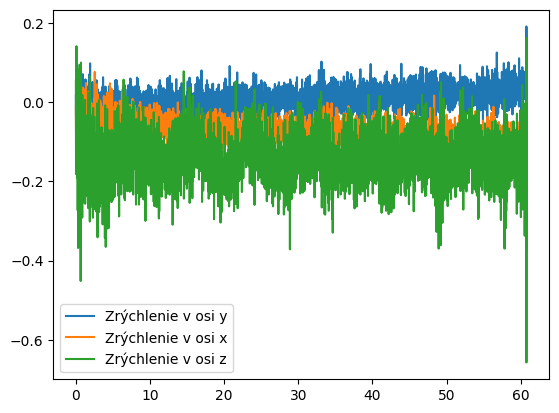

In [27]:
plt.plot(data_gg["time"],data_gg["ay"], label = 'Zrýchlenie v osi y')
plt.plot(data_gg["time"],data_gg["ax"], label = 'Zrýchlenie v osi x')
plt.plot(data_gg["time"],data_gg["az"], label = 'Zrýchlenie v osi z')
plt.legend()

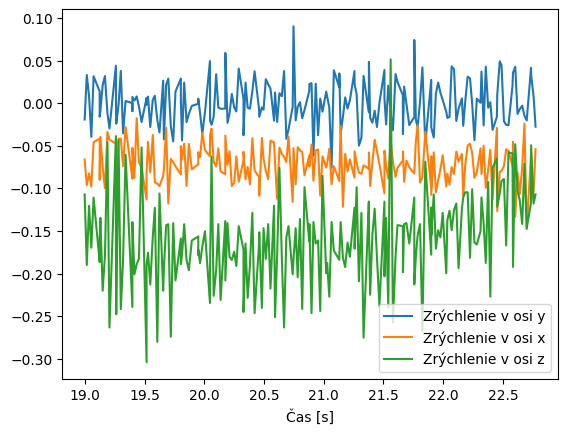

In [34]:
#Teraz sa zameriame na menší úsek našich dat
start_index = 1000
data_100 = data_gg.iloc[start_index:start_index + 200]


plt.plot(data_100["time"], data_100["ay"], label='Zrýchlenie v osi y')
plt.plot(data_100["time"], data_100["ax"], label='Zrýchlenie v osi x')
plt.plot(data_100["time"], data_100["az"], label='Zrýchlenie v osi z')

plt.legend()
plt.xlabel("Čas [s]")
plt.show()

Ako vidíme, aj stavby zdanlivo pevné a nehybné sa počas bežnej prevádzky urýchluju vo všetkých troch osiach. No keďže inžinieri navrhnú stavbu tak aby za žiadnych okolnosti preťaženia, alebo veterných podmienok nebola prekročená medz úmernosti, stavba sa vždy vráti do pôvodného stavu. Zoberte si SciLabs senzor a namerajtu zložky zrýchlenia najbližšieho mostu počas intervalu 5 min.